In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sunRay.parameters import c,c_r,R_S  # physics parameters
from scipy import integrate



In [2]:
data  = np.load('sunray_0.npz')

In [3]:
absorb_r = (np.count_nonzero((np.isnan(data.f.r_vec_collect_local[-1,1,:]))))/data.f.photon_N

In [4]:
# retrive the data from archive
steps_N  =data.f.steps_N
collect_N =data.f.collect_N
photon_N =data.f.photon_N
start_r =data.f.start_r
start_theta =data.f.start_theta
start_phi  =data.f.start_phi
f_ratio  =data.f.f_ratio
epsilon =data.f.epsilon 
anis =data.f.anis
asym =data.f.asym
t_collect=data.f.t_collect
tau=data.f.tau
r_vec_collect_local=data.f.r_vec_collect_local
k_vec_collect_local=data.f.k_vec_collect_local

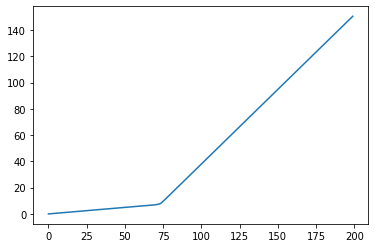

In [6]:
plt.plot(t_collect)

In [7]:
absorb_r

0.13254

In [8]:
find_small_1e3 = lambda arr:  np.sort(arr)[int(photon_N*1e-3)]

In [37]:
# collect the photons
r_vec_end = r_vec_collect_local[-1,:,:].reshape(3,-1)
k_vec_end = k_vec_collect_local[-1,:,:].reshape(3,-1)
rr_end = np.sqrt(np.sum(r_vec_end**2,axis=0))
kk_end = np.sqrt(np.sum(k_vec_end**2,axis=0))

kx_end,ky_end,kz_end = k_vec_end[0,:],k_vec_end[1,:],k_vec_end[2,:]



In [9]:
# use the majority photons
r_get = find_small_1e3(rr_end)
 

In [72]:
r_vec_end.shape

(3, 50000)

In [11]:
# fit to find t and x_im y_im

In [12]:
# histogram

In [8]:
R_S = 6.96e10         # the radius of the sun 
c   = 2.998e10        # speed of light
c_r = c/R_S           # [t]


In [48]:
idx_for_stat = np.where( (rr_end>(r_get-0.1)) & 
                         (kz_end/kk_end>0.9) & 
                         (kz_end/kk_end<1.0) )

In [88]:
x_im_stat = np.zeros(idx_for_stat[0].shape)
y_im_stat = np.zeros(idx_for_stat[0].shape)
t_reach_stat = np.zeros(idx_for_stat[0].shape)

idx_tmp = 0
for idx_cur in idx_for_stat[0]:
    # for all rays do the collect:
    r_vec_tmp = r_vec_collect_local[:,:,idx_cur]
    rr_tmp = np.sqrt(np.sum(r_vec_tmp**2,axis=1))
    idx_r_reach = np.argmin(np.abs(rr_tmp-r_get))
    # linear estimation of the [t,r,k] at r_get
    t_reach_tmp = (t_collect[idx_r_reach-1] + 
        (t_collect[idx_r_reach]-t_collect[idx_r_reach-1]) *
        (r_get-rr_tmp[idx_r_reach-1]) /
        (rr_tmp[idx_r_reach]-rr_tmp[idx_r_reach-1]) )

    r_vec_reach_tmp = (r_vec_collect_local[idx_r_reach-1,:,idx_cur] + 
        (r_vec_collect_local[idx_r_reach,:,idx_cur]-
         r_vec_collect_local[idx_r_reach-1,:,idx_cur]) *
        (r_get-rr_tmp[idx_r_reach-1]) /
        (rr_tmp[idx_r_reach]-rr_tmp[idx_r_reach-1]) )

    k_vec_reach_tmp = (k_vec_collect_local[idx_r_reach-1,:,idx_cur] + 
        (k_vec_collect_local[idx_r_reach,:,idx_cur]-
         k_vec_collect_local[idx_r_reach-1,:,idx_cur]) *
        (r_get-rr_tmp[idx_r_reach-1]) /
        (rr_tmp[idx_r_reach]-rr_tmp[idx_r_reach-1]) )

    t_reach_stat[idx_tmp] = t_reach_tmp

    kk_tmp = np.sqrt(np.sum(k_vec_reach_tmp**2))
    kx_tmp = k_vec_reach_tmp[0]
    ky_tmp = k_vec_reach_tmp[1]
    kz_tmp = k_vec_reach_tmp[2]

    # use Delta R as free path integral
    r_free_tmp_a = np.sqrt(np.sum((r_vec_reach_tmp - r_vec_collect_local[0,:,idx_cur])**2))
    # use t*c as free path integral
    r_free_tmp_b = t_reach_tmp*c_r

    x_im_stat[idx_tmp] = r_vec_reach_tmp[0] - r_free_tmp_a*kx_tmp/kk_tmp
    y_im_stat[idx_tmp] = r_vec_reach_tmp[1] - r_free_tmp_a*ky_tmp/kk_tmp

    idx_tmp = idx_tmp+1    


In [89]:
r_vec_tmp[0,:]

array([3.08436047e-02, 1.27919781e-04, 1.74993897e+00])

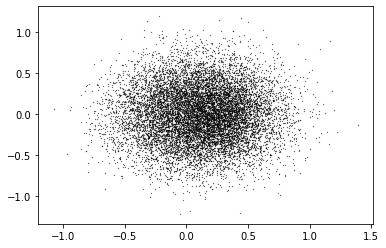

In [94]:
plt.plot(x_im_stat,y_im_stat,'k.',markersize=0.5)

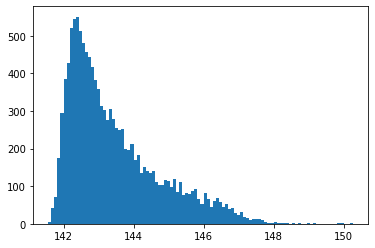

In [97]:
hst = plt.hist(t_reach_stat,100)